# [Wrap-up quiz 2](https://inria.github.io/scikit-learn-mooc/overfit/overfit_wrap_up_quiz.html)

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv('./datasets/blood_transfusion.csv')
target_name = 'Class'
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [6]:
target.describe()

count             748
unique              2
top       not donated
freq              570
Name: Class, dtype: object

In [7]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

The problem to be solved in a binary classification problem (exactly 2 possible classes).

The proportions of the class counts are imbalanced: Some classes have more than twice as many rows than others.

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy = DummyClassifier(strategy='most_frequent')

cv_scores = cross_validate(dummy, data, target, cv=10)

In [12]:
print(f"Average score of a dummy classifier: "
      f"{cv_scores['test_score'].mean():.3f}")

Average score of a dummy classifier: 0.762


In [13]:
cv_scores = cross_validate(
    dummy, data, target, cv=10, scoring='balanced_accuracy'
)

In [14]:
print(f"Average score with balanced accuracy of a dummy classifier: "
      f"{cv_scores['test_score'].mean():.3f}")

Average score with balanced accuracy of a dummy classifier: 0.500


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [19]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

The value of K is 5, i.e., `'kneighborsclassifier__n_neighbors': 5`

In [21]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

cv_scores = cross_validate(
    model, data, target, cv=10, 
    return_train_score=True, scoring='balanced_accuracy')

In [23]:
cv_scores['train_score']

array([0.89750853, 0.88595273, 0.87990375, 0.88282773, 0.89357943,
       0.8744883 , 0.88188353, 0.86743421, 0.8785006 , 0.88344049])

In [22]:
cv_scores['test_score']

array([0.51315789, 0.49122807, 0.5877193 , 0.27192982, 0.38596491,
       0.43859649, 0.56432749, 0.6622807 , 0.42156863, 0.50309598])

The model clearly overfit, i.e., trai score is greater than test score

In [24]:
from sklearn.model_selection import validation_curve

In [33]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = 'kneighborsclassifier__n_neighbors'

train_scores, test_scores = validation_curve(
    model, data, target,
    param_range=param_range, param_name=param_name, 
    cv=5, scoring='balanced_accuracy'
)

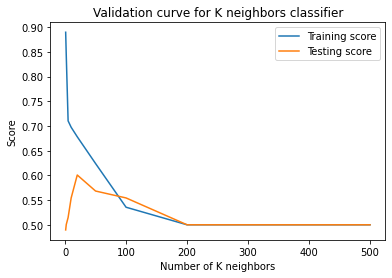

In [34]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_scores.mean(axis=1), label="Training score")
plt.plot(param_range, test_scores.mean(axis=1), label="Testing score")
plt.legend()

plt.xlabel("Number of K neighbors")
plt.ylabel("Score")
_ = plt.title("Validation curve for K neighbors classifier")